In [1]:
import pandas as pd
import plotly.express as px

In [4]:
df = pd.read_pickle('data/transition/test/0042100306_away.pkl')


In [5]:
test = df['Transition Object'].values[0]

In [13]:
pass_df = pd.read_pickle('data/transition/possession_summaries.pkl')

In [14]:
drive_df = pd.read_pickle('data/transition/drive_stats.pkl')
drive_df.head()

,Drive Indices,Drive Time,Drive Length (sec),Drive Distance,Drive Distance Total,Ground Made Up,# Defenders Passed,Driver,Transition Index,Outcome,OutcomeMSG,OutcomeMSGaction,Team Id,Team Name,Game Id
0,"(1, 50)",0.04,2,"(27.35, 0.08, 27.35)","(26.37, 8.01, 29.51)","[24.88, 19.38, 21.14, -2.16, -0.25]",0,Marcus Smart,0,NaN,NaN,NaN,feb4cb57-89ef-11e6-86b2-a45e60e298d3,Boston Celtics,31cb8a55-0ee0-4d47-aa38-4f512e54e763
1,"(53, 85)",2.12,1,"(22.2, 2.72, 22.37)","(21.54, 8.98, 24.85)","[8.89, -1.48, 1.05, -45.24, 56.44]",1,Jaylen Brown,1,shot,6.0,2.0,feb4cb57-89ef-11e6-86b2-a45e60e298d3,Boston Celtics,31cb8a55-0ee0-4d47-aa38-4f512e54e763
2,"(93, 122)",3.72,1,"(18.76, -3.28, 19.04)","(18.65, 10.14, 23.42)","[25.97, -37.18, 16.74, 15.72, -12.12]",2,Jayson Tatum,1,shot,6.0,2.0,feb4cb57-89ef-11e6-86b2-a45e60e298d3,Boston Celtics,31cb8a55-0ee0-4d47-aa38-4f512e54e763
3,"(126, 160)",5.04,1,"(6.68, 5.69, 8.77)","(8.76, 8.63, 14.46)","[14.25, -4.11, 2.71, -1.98, -33.76]",0,Jaylen Brown,1,shot,6.0,2.0,feb4cb57-89ef-11e6-86b2-a45e60e298d3,Boston Celtics,31cb8a55-0ee0-4d47-aa38-4f512e54e763
4,"(1, 55)",0.04,2,"(15.39, -1.83, 15.5)","(21.49, 8.29, 25.25)","[20.72, -16.26, -1.87, -17.94, -12.09]",1,Derrick White,2,shot,1.0,41.0,feb4cb57-89ef-11e6-86b2-a45e60e298d3,Boston Celtics,31cb8a55-0ee0-4d47-aa38-4f512e54e763


In [16]:
def_passed_means_player = pass_df.groupby(['Passer'])['# Defenders Passed'].mean() #number of defenders passed per pass in transition on average
def_passed_sums_player = pass_df.groupby(['Passer'])['# Defenders Passed'].sum() #total number of defenders passed in transition from all passes
num_passes_player = pass_df.groupby(['Passer'])['# Defenders Passed'].count() #total number of passess made in transition

def_passed_means_team = pass_df.groupby(['Team Name'])['# Defenders Passed'].mean()
def_passed_sums_team = pass_df.groupby(['Team Name'])['# Defenders Passed'].sum()
num_passes_team = pass_df.groupby(['Team Name'])['# Defenders Passed'].count()

def_drive_means_player = drive_df.groupby(['Driver'])['# Defenders Passed'].mean()
def_drive_sums_player = drive_df.groupby(['Driver'])['# Defenders Passed'].sum() #total number of defenders passed in transition from all passes
num_drive_player = drive_df.groupby(['Driver'])['# Defenders Passed'].count() #total number of passess made in transition

def_drive_means_team = drive_df.groupby(['Team Name'])['# Defenders Passed'].mean()
def_drive_sums_team = drive_df.groupby(['Team Name'])['# Defenders Passed'].sum()
num_drive_team = drive_df.groupby(['Team Name'])['# Defenders Passed'].count()

#TODO: look at number passes/drives per game!!

In [23]:
fig = px.scatter(x = def_passed_means_player.index, y = def_passed_means_player.values)
fig.update_layout(width=1200, height=500,  
                  title='Mean Defenders Passed On the Pass', title_x=0.5,
                  xaxis_title="Player") #template='plotly_dark',
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

fig = px.scatter(x = def_drive_means_player.index, y = def_drive_means_player.values)
fig.update_layout(width=1200, height=500,  
                  title='Mean Defenders Passed On the Drive', title_x=0.5,
                  xaxis_title="Player") #template='plotly_dark',
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

In [24]:
fig = px.scatter(x = def_passed_means_player.values, y = def_passed_sums_player.values, text = def_passed_sums_player.index)
fig.update_layout(width=1200, height=500,  
                  title='Total vs Mean Defenders Passed on the Pass', title_x=0.5,
                  xaxis_title="Mean", yaxis_title='Total') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

fig = px.scatter(x = def_drive_means_player.values, y = def_drive_sums_player.values, text = def_drive_sums_player.index)
fig.update_layout(width=1200, height=500,  
                  title='Total vs Mean Defenders Passed on the Drive', title_x=0.5,
                  xaxis_title="Mean", yaxis_title='Total') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

In [26]:
fig = px.scatter(x = def_passed_means_player.values, y = num_passes_player.values, text = def_passed_sums_player.index)
fig.update_layout(width=1200, height=500,  
                  title='Number of Passes vs Mean Defenders Passed on the Pass', title_x=0.5,
                  xaxis_title="Mean Defenders Passed", yaxis_title='Total Number of Passes') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

fig = px.scatter(x = def_drive_means_player.values, y = num_drive_player.values, text = def_drive_sums_player.index)
fig.update_layout(width=1200, height=500,  
                  title='Number of Drives vs Mean Defenders Passed on the Drive', title_x=0.5,
                  xaxis_title="Mean Defenders Passed", yaxis_title='Total Number of Drives') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

In [27]:
fig = px.scatter(x = def_passed_means_team.index, y = def_passed_means_team.values)
fig.update_layout(width=800, height=600,  
                  title='Mean Defenders Passed On the Pass by Team', title_x=0.5,
                  xaxis_title="Team") #template='plotly_dark',
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

fig = px.scatter(x = def_drive_means_team.index, y = def_drive_means_team.values)
fig.update_layout(width=800, height=600,  
                  title='Mean Defenders Passed On the Drive by Team', title_x=0.5,
                  xaxis_title="Team") #template='plotly_dark',
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

In [28]:
fig = px.scatter(x = def_passed_means_team.values, y = def_passed_sums_team.values, text = def_passed_sums_team.index)
fig.update_layout(width=800, height=500,  
                  title='Total vs Mean Defenders Passed on the Pass by Team', title_x=0.5,
                  xaxis_title="Mean", yaxis_title='Total') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

fig = px.scatter(x = def_drive_means_team.values, y = def_drive_sums_team.values, text = def_drive_sums_team.index)
fig.update_layout(width=800, height=500,  
                  title='Total vs Mean Defenders Passed on the Drive by Team', title_x=0.5,
                  xaxis_title="Mean", yaxis_title='Total') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

In [29]:
fig = px.scatter(x = def_passed_means_team.values, y = num_passes_team.values, text = def_passed_sums_team.index)
fig.update_layout(width=800, height=500,  
                  title='Number of Passes vs Mean Defenders Passed on the Pass by Team', title_x=0.5,
                  xaxis_title="Mean Defenders Passed", yaxis_title='Total Number of Passes') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

fig = px.scatter(x = def_drive_means_team.values, y = num_drive_team.values, text = def_drive_sums_team.index)
fig.update_layout(width=800, height=500,  
                  title='Number of Drives vs Mean Defenders Passed on the Drive by Team', title_x=0.5,
                  xaxis_title="Mean Defenders Passed", yaxis_title='Total Number of Drives') #template='plotly_dark',
fig.update_traces(textposition='top center')
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

In [32]:
f2 = px.box(pass_df, x='Passer', y='# Defenders Passed')
fig.update_layout(width=1200, height=500, title='On the Pass') #template='plotly_dark',
#plt.xticks(rotation=90)
f2.show()

f3 = px.box(drive_df, x='Driver', y='# Defenders Passed')
fig.update_layout(width=1200, height=500, title='On the Drive') 
#plt.xticks(rotation=90)
f3.show()

Look at stats by team based on the transition trigger

<Axes: xlabel='Team Name'>

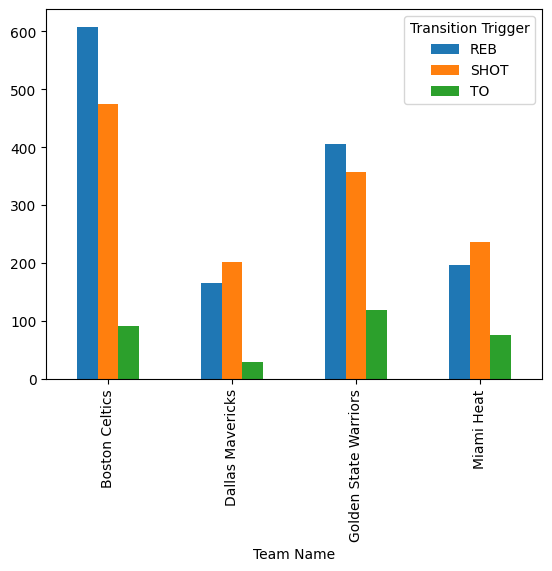

In [57]:
pass_df.groupby(['Team Name','Transition Trigger'])['# Defenders Passed'].count().unstack('Transition Trigger').plot.bar()

<Axes: xlabel='Team Name'>

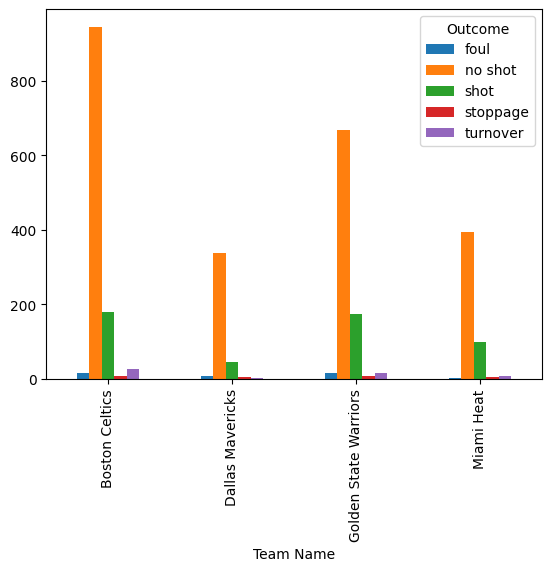

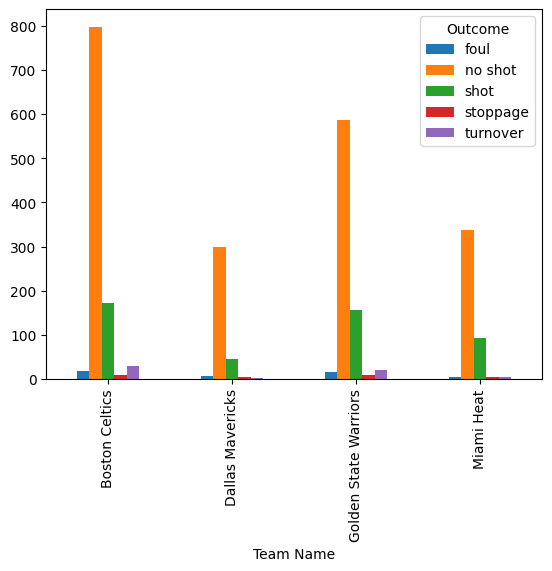

In [56]:
pass_df.groupby(['Team Name', 'Outcome'])['# Defenders Passed'].count().unstack('Outcome').plot.bar()
drive_df.groupby(['Team Name', 'Outcome'])['# Defenders Passed'].count().unstack('Outcome').plot.bar()

<Axes: xlabel='Team Name,Transition Trigger'>

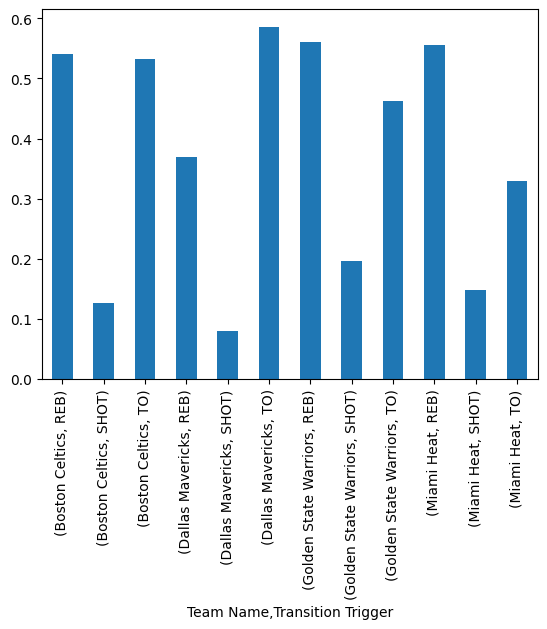

In [51]:
def_passed_means_team.plot(x='Team Name', kind='bar')

In [37]:
fig = px.scatter(x = def_passed_means_team.index, y = def_passed_means_team.values)
fig.update_layout(width=800, height=600,  
                  title='Mean Defenders Passed On the Pass by Team', title_x=0.5,
                  xaxis_title="Team") #template='plotly_dark',
#fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
fig.show()

# fig = px.scatter(x = def_drive_means_team.index, y = def_drive_means_team.values)
# fig.update_layout(width=800, height=600,  
#                   title='Mean Defenders Passed On the Drive by Team', title_x=0.5,
#                   xaxis_title="Team") #template='plotly_dark',
# #fig.update_traces(textfont_size=11, marker=dict(size=10), textposition=improve_text_position(df['reb']))
# fig.show()

TypeError: Argument 'x' is a pandas MultiIndex. pandas MultiIndex is not supported by plotly express at the moment.